In [1]:
import pandas as pd, matplotlib.pyplot as plt
from randan.bivariate_association import Crosstab, Correlation
from randan.descriptive_statistics import ScaleStatistics, NominalStatistics

In [2]:
df1 = pd.read_excel('FL_Конкурсы_20231112.xlsx', index_col=0)
df2 = pd.read_excel('FL_Конкурсы_Агрегированный.xlsx', index_col=0)
df = pd.concat([df1, df2])  
df.drop_duplicates(inplace=True)
df

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание конкурса,URL заказчика,Раздел,...,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-,Дата обращения
https://www.fl.ru/projects/5233285/,False,False,True,Изготовить дизайн одежды для спорт клуба,rotshelda,07.10.2023,35000.0,Техническое задание для дизайнеров на создание...,https://www.fl.ru/users/rotshelda,Дизайн и Арт,...,True,False,False,3.0,10.0,4799.75,0.0,2.0,0.0,NaN
https://www.fl.ru/projects/5249195/,False,False,False,Создание логотипа в векторе для музыкального п...,Кирилл Бессалаев,12.11.2023,5000.0,Необходимо создать логотип музыкального продак...,https://www.fl.ru/users/bessalaevkv44,Дизайн и Арт/Логотипы,...,True,False,False,0.0,0.0,183.33,0.0,0.0,0.0,NaN
https://www.fl.ru/projects/5248932/,False,True,False,Дизайн логотипа,mrmazoff,11.11.2023,5000.0,Необходимо создать логотип компании «А2 Систем...,https://www.fl.ru/users/mrmazoff,Дизайн и Арт/Логотипы,...,False,False,False,0.0,0.0,204.00,0.0,0.0,0.0,NaN
https://www.fl.ru/projects/5248597/,False,False,False,Дизайнер. Создание логотипа для завода ЖБК,Александр Терно,10.11.2023,10000.0,Приветствую. Нужно создать логотип для завода...,https://www.fl.ru/users/menejt46,Дизайн и Арт/Логотипы,...,False,False,False,0.0,0.0,184.33,0.0,0.0,0.0,NaN
https://www.fl.ru/projects/5248556/,False,False,False,Этикетка краски,irinavarsharo23,10.11.2023,6000.0,Предложить визуальную концепцию краски для меб...,https://www.fl.ru/users/irinavarsharo23,Дизайн и Арт/Дизайн упаковки,...,True,False,False,0.0,0.0,183.33,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.fl.ru/projects/5079567,False,False,False,Концепт дизайн упаковки,Андрей Лисицын bidheadshow,25.11.2022,6000.0,Доброго времени суток! Необходимо создать диза...,https://www.fl.ru/users/bidheadshow,Полиграфия / Дизайн упаковки,...,1.0,0.0,0.0,0.0,0.0,185.33,0.0,0.0,0.0,20221126.0
https://www.fl.ru/projects/5079683,False,False,False,Логотип для программного продукта Chronos,Nikita Karpov medray,25.11.2022,12000.0,Компания Artrvision занимается разработкой раз...,https://www.fl.ru/users/medray,Дизайн и Арт / Логотипы,...,1.0,0.0,0.0,10.0,7.0,2531.33,0.0,0.0,0.0,20221126.0
https://www.fl.ru/projects/5079691,False,False,False,Логотип компании Motyga,Nikita Karpov medray,25.11.2022,9000.0,"Логотип компании Motyga от русского слова ""Мот...",https://www.fl.ru/users/medray,Дизайн и Арт / Логотипы,...,1.0,0.0,0.0,10.0,7.0,2531.33,0.0,0.0,0.0,20221126.0
https://www.fl.ru/projects/5079801,False,False,False,Логотип для сервиса по размещению рекламы в со...,mrplutus1,26.11.2022,5000.0,Добрый день уважаемые дизайнеры ! Нужен логоти...,https://www.fl.ru/users/mrplutus1,Дизайн и Арт / Логотипы,...,0.0,0.0,0.0,1.0,0.0,186.33,0.0,0.0,0.0,20221126.0


In [3]:
slice_df = df[df["Бюджет"] > df["Бюджет"].mean()] # все конкурсы с бюджетом выше среднего
slice_df = slice_df.copy()
slice_df

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание конкурса,URL заказчика,Раздел,...,Email подтвержден,Паспортные данные проверены,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-,Дата обращения
https://www.fl.ru/projects/5233285/,False,False,True,Изготовить дизайн одежды для спорт клуба,rotshelda,07.10.2023,35000.0,Техническое задание для дизайнеров на создание...,https://www.fl.ru/users/rotshelda,Дизайн и Арт,...,True,False,False,3.0,10.0,4799.75,0.0,2.0,0.0,NaN
https://www.fl.ru/projects/5241365/,False,False,False,Разработка логотипа для ИТ-компании,sergeysuchkov91,25.10.2023,25000.0,"Название компании: ""Волга Диджитал Солюшнс"", ""...",https://www.fl.ru/users/sergeysuchkov91,Дизайн и Арт/Логотипы,...,True,False,False,1.0,11.0,670.02,0.0,0.0,0.0,NaN
https://www.fl.ru/projects/5241198/,False,True,True,UPD: Дизайн календаря-буклета ТМ «Именитые»,Алексей Го,25.10.2023,30000.0,Конкурс на создание макета календаря-домика с ...,https://www.fl.ru/users/svejeproduct,Дизайн и Арт,...,True,True,False,10.0,1.0,3180.20,0.0,1.0,0.0,NaN
https://www.fl.ru/projects/5241173/,False,False,False,Сделать дизайн и фирменный стиль логотипа и уп...,ipopov89,25.10.2023,20000.0,ТЗ для разработки дизайна и бренда для нашей л...,https://www.fl.ru/users/ipopov89,Дизайн и Арт,...,True,False,False,0.0,0.0,188.33,0.0,0.0,0.0,NaN
https://www.fl.ru/projects/5240834/,False,False,False,Разработать Логотип РАСЦВЕТАЙ АВТОСИТИ,pslepchenko,24.10.2023,50000.0,Разработать Логотип РАСЦВЕТАЙ АВТОСИТИ Кратко...,https://www.fl.ru/users/pslepchenko,Дизайн и Арт/Логотипы,...,True,False,False,0.0,0.0,190.33,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.fl.ru/projects/5071627,False,False,False,Конкурс на разработку фирменного стиля,kornilaevakseni,10.11.2022,20000.0,Компания «Надо денег» объявляет конкурс на раз...,https://www.fl.ru/users/kornilaevakseni,Дизайн и Арт / Фирменный стиль,...,1.0,0.0,1.0,0.0,0.0,195.33,0.0,0.0,0.0,20221126.0
https://www.fl.ru/projects/5071770,False,False,False,Разработка логотипа для нового бренда автохими...,Анна Бахолдина Anna-290,10.11.2022,19000.0,Необходимо разработать логотип и шаблон этикет...,https://www.fl.ru/users/Anna-290,Дизайн и Арт / Логотипы,...,1.0,0.0,0.0,9.0,3.0,362.00,0.0,0.0,0.0,20221126.0
https://www.fl.ru/projects/5075319,False,False,False,Лого и фирстиль для компании поставщика банков...,kkozyreva,17.11.2022,30000.0,Сайт atmseller.ru/ (ему предстоит пройти ребре...,https://www.fl.ru/users/kkozyreva,Дизайн и Арт / Логотипы,...,1.0,0.0,1.0,0.0,2.0,389.41,0.0,2.0,0.0,20221126.0
https://www.fl.ru/projects/5078264,False,False,False,Нейминг / ренейминг / новое название / новое н...,resheniesk,23.11.2022,20000.0,"Разработка нового имени для компании, которая ...",https://www.fl.ru/users/resheniesk,Тексты / Слоганы/Нейминг,...,1.0,0.0,0.0,0.0,1.0,194.33,0.0,0.0,0.0,20221126.0


In [4]:
for i in slice_df.index:
    try:
        slice_df.loc[i, "Раздел_общий"] = slice_df.loc[i, "Раздел"].split("/")[0]
    except:
        slice_df.loc[i, "Раздел_общий"] = slice_df.loc[i, "Раздел"]

In [5]:
for i in slice_df.index:
    if slice_df.loc[i, "Раздел_общий"][-1] == " ":
        slice_df.loc[i, "Раздел_общий"] = slice_df.loc[i, "Раздел_общий"][:-1]

In [6]:
# первая содержательная задача - "Негативное влияние раздела конкурса на число участников"

# "Раздел" - номинальная недихотомическая переменная
# "Участники" - интервальная переменная

# H0: связь между переменными "Раздел" и "Участники" отсутствует
# H1: связь между переменными "Раздел" и "Участники" есть

# доверительная вероятность 95%

In [7]:
ss = ScaleStatistics(slice_df, ['Участники'])


SCALE STATISTICS SUMMARY
------------------



,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
Участники,82.000,6.000,28.000,42.915,14.250,66.500,52.250,0.268,0.000,195.000,195.000,37.315,1392.425,0.979,0.997


Following variables have multiple modes: Участники


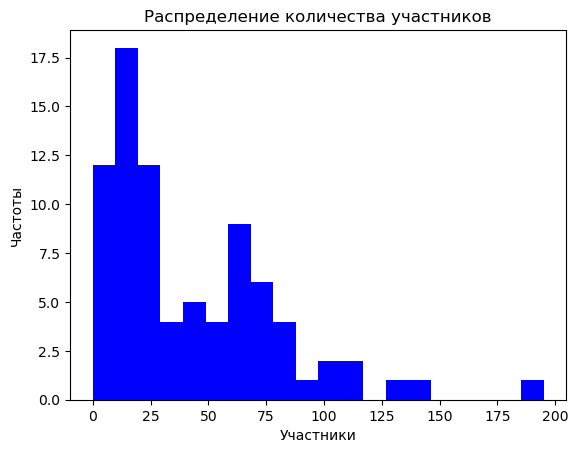

In [8]:
plt.hist(slice_df['Участники'].dropna(), bins=20, color='blue')
plt.title('Распределение количества участников') 
plt.xlabel('Участники')
plt.ylabel('Частоты');

In [9]:
# наблюдаем смещение значений в сторону 0-25 и однородность
print("Репрезентирующее значение: ", ss.summary()['mean']['Участники'])

Репрезентирующее значение:  42.91463414634146


In [10]:
ns = NominalStatistics(slice_df, ['Раздел_общий'])


NOMINAL STATISTICS SUMMARY
------------------



,N,mode,entropy coef.,quality var.
Раздел_общий,82,Дизайн и Арт,0.511,0.505



FREQUENCIES
------------------

variable: Раздел_общий


,N,%
Дизайн и Арт,61,74.390
Тексты,6,7.317
Разработка сайтов,5,6.098
Полиграфия,4,4.878
Архитектура,3,3.659
Инжиниринг,2,2.439
Программирование,1,1.220


In [11]:
# Наблюдаем смещение значений в сторону блока "Дизайн и Арт"
# Наблюдаем неоднородность, так как entropy coef > 0.5
print("Репрезентирующее значение: ", ns.summary()['mode']['Раздел_общий'])

Репрезентирующее значение:  Дизайн и Арт


In [12]:
ctab = Crosstab(slice_df, "Раздел_общий", "Участники")


CROSSTAB SUMMARY
------------------

Observed frequencies


Участники,0.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,26.000000,27.000000,28.000000,33.000000,34.000000,35.000000,37.000000,39.000000,40.000000,43.000000,47.000000,48.000000,49.000000,51.000000,56.000000,60.000000,62.000000,64.000000,65.000000,67.000000,68.000000,70.000000,74.000000,76.000000,77.000000,78.000000,80.000000,81.000000,86.000000,91.000000,105.000000,108.000000,109.000000,132.000000,143.000000,195.000000,Total
Раздел_общий,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Архитектура,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
Дизайн и Арт,0,0,0,0,1,1,1,0,0,2,2,0,2,1,2,1,1,1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,1,1,1,0,1,2,1,2,1,1,1,1,1,2,1,2,0,1,1,1,0,2,1,1,1,1,1,61
Инжиниринг,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Полиграфия,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
Программирование,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Разработка сайтов,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
Тексты,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,6
Total,1,1,1,1,1,3,2,1,1,2,3,2,2,1,3,2,1,2,1,1,2,1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,3,1,1,2,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,1,82


------------------

Expected frequencies


Участники,0.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,26.000000,27.000000,28.000000,33.000000,34.000000,35.000000,37.000000,39.000000,40.000000,43.000000,47.000000,48.000000,49.000000,51.000000,56.000000,60.000000,62.000000,64.000000,65.000000,67.000000,68.000000,70.000000,74.000000,76.000000,77.000000,78.000000,80.000000,81.000000,86.000000,91.000000,105.000000,108.000000,109.000000,132.000000,143.000000,195.000000,Total
Раздел_общий,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Архитектура,0.037,0.037,0.037,0.037,0.037,0.110,0.073,0.037,0.037,0.073,0.110,0.073,0.073,0.037,0.110,0.073,0.037,0.073,0.037,0.037,0.073,0.037,0.073,0.073,0.037,0.073,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.073,0.037,0.110,0.037,0.037,0.073,0.037,0.037,0.073,0.037,0.073,0.037,0.037,0.037,0.037,0.037,0.073,0.037,0.037,0.037,0.037,0.037,3
Дизайн и Арт,0.744,0.744,0.744,0.744,0.744,2.232,1.488,0.744,0.744,1.488,2.232,1.488,1.488,0.744,2.232,1.488,0.744,1.488,0.744,0.744,1.488,0.744,1.488,1.488,0.744,1.488,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,0.744,1.488,0.744,2.232,0.744,0.744,1.488,0.744,0.744,1.488,0.744,1.488,0.744,0.744,0.744,0.744,0.744,1.488,0.744,0.744,0.744,0.744,0.744,61
Инжиниринг,0.024,0.024,0.024,0.024,0.024,0.073,0.049,0.024,0.024,0.049,0.073,0.049,0.049,0.024,0.073,0.049,0.024,0.049,0.024,0.024,0.049,0.024,0.049,0.049,0.024,0.049,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.024,0.049,0.024,0.073,0.024,0.024,0.049,0.024,0.024,0.049,0.024,0.049,0.024,0.024,0.024,0.024,0.024,0.049,0.024,0.024,0.024,0.024,0.024,2
Полиграфия,0.049,0.049,0.049,0.049,0.049,0.146,0.098,0.049,0.049,0.098,0.146,0.098,0.098,0.049,0.146,0.098,0.049,0.098,0.049,0.049,0.098,0.049,0.098,0.098,0.049,0.098,0.049,0.049,0.049,0.049,0.049,0.049,0.049,0.049,0.049,0.049,0.049,0.098,0.049,0.146,0.049,0.049,0.098,0.049,0.049,0.098,0.049,0.098,0.049,0.049,0.049,0.049,0.049,0.098,0.049,0.049,0.049,0.049,0.049,4
Программирование,0.012,0.012,0.012,0.012,0.012,0.037,0.024,0.012,0.012,0.024,0.037,0.024,0.024,0.012,0.037,0.024,0.012,0.024,0.012,0.012,0.024,0.012,0.024,0.024,0.012,0.024,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.012,0.024,0.012,0.037,0.012,0.012,0.024,0.012,0.012,0.024,0.012,0.024,0.012,0.012,0.012,0.012,0.012,0.024,0.012,0.012,0.012,0.012,0.012,1
Разработка сайтов,0.061,0.061,0.061,0.061,0.061,0.183,0.122,0.061,0.061,0.122,0.183,0.122,0.122,0.061,0.183,0.122,0.061,0.122,0.061,0.061,0.122,0.061,0.122,0.122,0.061,0.122,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.122,0.061,0.183,0.061,0.061,0.122,0.061,0.061,0.122,0.061,0.122,0.061,0.061,0.061,0.061,0.061,0.122,0.061,0.061,0.061,0.061,0.061,5
Тексты,0.073,0.073,0.073,0.073,0.073,0.220,0.146,0.073,0.073,0.146,0.220,0.146,0.146,0.073,0.220,0.146,0.073,0.146,0.073,0.073,0.146,0.073,0.146,0.146,0.073,0.146,0.073,0.073,0.073,0.073,0.073,0.073,0.073,0.073,0.073,0.073,0.073,0.146,0.073,0.220,0.073,0.073,0.146,0.073,0.073,0.146,0.073,0.146,0.073,0.073,0.073,0.073,0.073,0.146,0.073,0.073,0.073,0.073,0.073,6
Total,1.000,1.000,1.000,1.000,1.000,3.000,2.000,1.000,1.000,2.000,3.000,2.000,2.000,1.000,3.000,2.000,1.000,2.000,1.000,1.000,2.000,1.000,2.000,2.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,3.000,1.000,1.000,2.000,1.000,1.000,2.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,82


413 (100.0%) cells have expected frequency less than 5. The minimum expected frequency is 0.012.
------------------

Chi-square statistic is 338.366 (p-value = 0.634).
------------------

Pearson's residuals


Участники,0.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,13.000000,14.000000,15.000000,16.000000,17.000000,18.000000,19.000000,20.000000,21.000000,22.000000,23.000000,24.000000,26.000000,27.000000,28.000000,33.000000,34.000000,35.000000,37.000000,39.000000,40.000000,43.000000,47.000000,48.000000,49.000000,51.000000,56.000000,60.000000,62.000000,64.000000,65.000000,67.000000,68.000000,70.000000,74.000000,76.000000,77.000000,78.000000,80.000000,81.000000,86.000000,91.000000,105.000000,108.000000,109.000000,132.000000,143.000000,195.000000
Раздел_общий,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Архитектура,-0.191,-0.191,-0.191,-0.191,-0.191,-0.331,-0.271,-0.191,5.037,-0.271,-0.331,3.426,-0.271,-0.191,2.687,-0.271,-0.191,-0.271,-0.191,-0.191,-0.271,-0.191,-0.271,-0.271,-0.191,-0.271,-0.191,-0.191,-0.191,-0.191,-0.191,-0.191,-0.191,-0.191,-0.191,-0.191,-0.191,-0.271,-0.191,-0.331,-0.191,-0.191,-0.271,-0.191,-0.191,-0.271,-0.191,-0.271,-0.191,-0.191,-0.191,-0.191,-0.191,-0.271,-0.191,-0.191,-0.191,-0.191,-0.191
Дизайн и Арт,-0.862,-0.862,-0.862,-0.862,0.297,-0.824,-0.400,-0.862,-0.862,0.420,-0.155,-1.220,0.420,0.297,-0.155,-0.400,0.297,-0.400,0.297,0.297,0.420,0.297,-0.400,0.420,0.297,0.420,0.297,0.297,0.297,0.297,0.297,0.297,0.297,0.297,0.297,-0.862,0.297,0.420,0.297,-0.155,0.297,0.297,-0.400,0.297,0.297,0.420,0.297,0.420,-0.862,0.297,0.297,0.297,-0.862,0.420,0.297,0.297,0.297,0.297,0.297
Инжиниринг,-0.156,-0.156,-0.156,6.247,-0.156,3.426,-0.221,-0.156,-0.156,-0.221,-0.271,-0.221,-0.221,-0.156,-0.271,-0.221,-0.156,-0.221,-0.156,-0.156,-0.221,-0.156,-0.221,-0.221,-0.156,-0.221,-0.156,-0.156,-0.156,-0.156,-0.156,-0.156,-0.156,-0.156,-0.156,-0.156,-0.156,-0.221,-0.156,-0.271,-0.156,-0.156,-0.221,-0.156,-0.156,-0.221,-0.156,-0.221,-0.156,-0.156,-0.156,-0.156,-0.156,-0.221,-0.156,-0.156,-0.156,-0.156,-0.156
Полиграфия,-0.221,-0.221,-0.221,-0.221,-0.221,2.232,-0.312,4.307,-0.221,-0.312,-0.383,-0.312,-0.312,-0.221,-0.383,2.889,-0.221,-0.312,-0.221,-0.221,-0.312,-0.221,2.889,-0.312,-0.221,-0.312,-0.221,-0.221,-0.221,-0.221,-0.221,-0.221,-0.221,-0.221,-0.221,-0.221,-0.221,-0.312,-0.221,-0.383,-0.221,-0.221,-0.312,-0.221,-0.221,-0.312,-0.221,-0.312,-0.221,-0.221,-0.221,-0.221,-0.221,-0.312,-0.221,-0.221,-0.221,-0.221,-0.221
Программирование,8.945,-0.110,-0.110,-0.110,-0.110,-0.191,-0.156,-0.110,-0.110,-0.156,-0.191,-0.156,-0.156,-0.110,-0.191,-0.156,-0.110,-0.156,-0.110,-0.110,-0.156,-0.110,-0.156,-0.156,-0.110,-0.156,-0.110,-0.110,-0.110,-0.110,-0.110,-0.110,-0.110,-0.110,-0.110,-0.110,-0.110,-0.156,-0.110,-0.191,-0.110,-0.110,-0.156,-0.110,-0.110,-0.156,-0.110,-0.156,-0.110,-0.110,-0.110,-0.110,-0.110,-0.156,-0.110,-0.110,-0.110,-0.110,-0.110
Разработка сайтов,-0.247,-0.247,-0.247,-0.247,-0.247,-0.428,2.514,-0.247,-0.247,-0.349,1.910,2.514,-0.349,-0.247,-0.428,-0.349,-0.247,2.514,-0.247,-0.247,-0.349,-0.247,-0.349,-0.349,-0.247,-0.349,-0.247,-0.247,-0.247,-0.247,-0.247,-0.247,-0.247,-0.247,-0.247,-0.247,-0.247,-0.349,-0.247,1.910,-0.247,-0.247,-0.349,-0.247,-0.247,-0.349,-0.247,-0.349,-0.247,-0.247,-0.247,-0.247,-0.247,-0.349,-0.247,-0.247,-0.247,-0.247,-0.247
Тексты,-0.271,3.426,3.426,-0.271,-0.271,-0.469,-0.383,-0.271,-0.271,-0.383,-0.469,-0.383,-0.383,-0.271,-0.469,-0.383,-0.271,-0.383,-0.271,-0.271,-0.383,-0.271,-0.383,-0.383,-0.271,-0.383,-0.271,-0.271,-0.271,-0.271,-0.271,-0.271,-0.271,-0.271,-0.271,3.426,-0.271,-0.383,-0.271,-0.469,-0.271,-0.271,2.232,-0.271,-0.271,-0.383,-0.271,-0.383,3.426,-0.271,-0.271,-0.271,3.426,-0.383,-0.271,-0.271,-0.271,-0.271,-0.271


19 (4.6%) cells have Pearson's residual bigger than 1.96. 
The biggest residual is 8.945 (categories Программирование and 0.0).
The smallest residual is -1.22 (categories Дизайн и Арт and 13.0).


In [13]:
# 100% ячеек имеют ожидаемые частоты меньше 5.
# Таблица сопряженности очень разрежена, => полученным выводам доверять нельзя

In [14]:
participants_ranges = [round(ss.summary()['25%']['Участники'], 0),
                      round(ss.summary()['median']['Участники'], 0),
                      round(ss.summary()['75%']['Участники'], 0),
                      round(ss.summary()['max']['Участники'], 0)]
participants_ranges

[14.0, 28.0, 66.0, 195.0]

In [15]:
participants_labels = ["1) До 14 уч - Наименее популярные",
                      "2) До 28 уч - Слабо популярные",
                      "3) До 66 уч - Популярные",
                      "4) До 195 уч - Наиболее популярные"]

In [16]:
slice_df.loc[slice_df['Участники'] <= participants_ranges[0], 'Диапазон_участников'] = participants_labels[0]
for i in range(1, len(participants_ranges)):
    slice_df.loc[(df['Участники'] > participants_ranges[i-1]) & (slice_df['Участники'] <= participants_ranges[i]), 
            'Диапазон_участников'] = participants_labels[i]
slice_df

,Закреп конкурса,Срочность конкурса,Цвет конкурса,Название конкурса,Заказчик конкурса,Дата регистрации конкурса,Бюджет,Описание конкурса,URL заказчика,Раздел,...,Данные юридического лица/ИП проверены,Лет на сайте,Месяцев на сайте,Рейтинг,Выбран[а] исполнителем,Отзывы+,Отзывы-,Дата обращения,Раздел_общий,Диапазон_участников
https://www.fl.ru/projects/5233285/,False,False,True,Изготовить дизайн одежды для спорт клуба,rotshelda,07.10.2023,35000.0,Техническое задание для дизайнеров на создание...,https://www.fl.ru/users/rotshelda,Дизайн и Арт,...,False,3.0,10.0,4799.75,0.0,2.0,0.0,NaN,Дизайн и Арт,2) До 28 уч - Слабо популярные
https://www.fl.ru/projects/5241365/,False,False,False,Разработка логотипа для ИТ-компании,sergeysuchkov91,25.10.2023,25000.0,"Название компании: ""Волга Диджитал Солюшнс"", ""...",https://www.fl.ru/users/sergeysuchkov91,Дизайн и Арт/Логотипы,...,False,1.0,11.0,670.02,0.0,0.0,0.0,NaN,Дизайн и Арт,4) До 195 уч - Наиболее популярные
https://www.fl.ru/projects/5241198/,False,True,True,UPD: Дизайн календаря-буклета ТМ «Именитые»,Алексей Го,25.10.2023,30000.0,Конкурс на создание макета календаря-домика с ...,https://www.fl.ru/users/svejeproduct,Дизайн и Арт,...,False,10.0,1.0,3180.20,0.0,1.0,0.0,NaN,Дизайн и Арт,2) До 28 уч - Слабо популярные
https://www.fl.ru/projects/5241173/,False,False,False,Сделать дизайн и фирменный стиль логотипа и уп...,ipopov89,25.10.2023,20000.0,ТЗ для разработки дизайна и бренда для нашей л...,https://www.fl.ru/users/ipopov89,Дизайн и Арт,...,False,0.0,0.0,188.33,0.0,0.0,0.0,NaN,Дизайн и Арт,2) До 28 уч - Слабо популярные
https://www.fl.ru/projects/5240834/,False,False,False,Разработать Логотип РАСЦВЕТАЙ АВТОСИТИ,pslepchenko,24.10.2023,50000.0,Разработать Логотип РАСЦВЕТАЙ АВТОСИТИ Кратко...,https://www.fl.ru/users/pslepchenko,Дизайн и Арт/Логотипы,...,False,0.0,0.0,190.33,0.0,0.0,0.0,NaN,Дизайн и Арт,4) До 195 уч - Наиболее популярные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.fl.ru/projects/5071627,False,False,False,Конкурс на разработку фирменного стиля,kornilaevakseni,10.11.2022,20000.0,Компания «Надо денег» объявляет конкурс на раз...,https://www.fl.ru/users/kornilaevakseni,Дизайн и Арт / Фирменный стиль,...,1.0,0.0,0.0,195.33,0.0,0.0,0.0,20221126.0,Дизайн и Арт,2) До 28 уч - Слабо популярные
https://www.fl.ru/projects/5071770,False,False,False,Разработка логотипа для нового бренда автохими...,Анна Бахолдина Anna-290,10.11.2022,19000.0,Необходимо разработать логотип и шаблон этикет...,https://www.fl.ru/users/Anna-290,Дизайн и Арт / Логотипы,...,0.0,9.0,3.0,362.00,0.0,0.0,0.0,20221126.0,Дизайн и Арт,4) До 195 уч - Наиболее популярные
https://www.fl.ru/projects/5075319,False,False,False,Лого и фирстиль для компании поставщика банков...,kkozyreva,17.11.2022,30000.0,Сайт atmseller.ru/ (ему предстоит пройти ребре...,https://www.fl.ru/users/kkozyreva,Дизайн и Арт / Логотипы,...,1.0,0.0,2.0,389.41,0.0,2.0,0.0,20221126.0,Дизайн и Арт,2) До 28 уч - Слабо популярные
https://www.fl.ru/projects/5078264,False,False,False,Нейминг / ренейминг / новое название / новое н...,resheniesk,23.11.2022,20000.0,"Разработка нового имени для компании, которая ...",https://www.fl.ru/users/resheniesk,Тексты / Слоганы/Нейминг,...,0.0,0.0,1.0,194.33,0.0,0.0,0.0,20221126.0,Тексты,3) До 66 уч - Популярные


In [17]:
ctab = Crosstab(slice_df, "Раздел_общий", "Диапазон_участников")


CROSSTAB SUMMARY
------------------

Observed frequencies


Диапазон_участников,1) До 14 уч - Наименее популярные,2) До 28 уч - Слабо популярные,3) До 66 уч - Популярные,4) До 195 уч - Наиболее популярные,Total
Раздел_общий,,,,,
Архитектура,2,1,0,0,3
Дизайн и Арт,9,17,17,18,61
Инжиниринг,2,0,0,0,2
Полиграфия,2,2,0,0,4
Программирование,1,0,0,0,1
Разработка сайтов,3,1,1,0,5
Тексты,2,0,1,3,6
Total,21,21,19,21,82


------------------

Expected frequencies


Диапазон_участников,1) До 14 уч - Наименее популярные,2) До 28 уч - Слабо популярные,3) До 66 уч - Популярные,4) До 195 уч - Наиболее популярные,Total
Раздел_общий,,,,,
Архитектура,0.768,0.768,0.695,0.768,3
Дизайн и Арт,15.622,15.622,14.134,15.622,61
Инжиниринг,0.512,0.512,0.463,0.512,2
Полиграфия,1.024,1.024,0.927,1.024,4
Программирование,0.256,0.256,0.232,0.256,1
Разработка сайтов,1.280,1.280,1.159,1.280,5
Тексты,1.537,1.537,1.390,1.537,6
Total,21.000,21.000,19.000,21.000,82


24 (85.714%) cells have expected frequency less than 5. The minimum expected frequency is 0.232.
------------------

Chi-square statistic is 26.756 (p-value = 0.084).
------------------

Pearson's residuals


Диапазон_участников,1) До 14 уч - Наименее популярные,2) До 28 уч - Слабо популярные,3) До 66 уч - Популярные,4) До 195 уч - Наиболее популярные
Раздел_общий,,,,
Архитектура,1.405,0.264,-0.834,-0.877
Дизайн и Арт,-1.675,0.349,0.762,0.602
Инжиниринг,2.079,-0.716,-0.681,-0.716
Полиграфия,0.964,0.964,-0.963,-1.012
Программирование,1.470,-0.506,-0.481,-0.506
Разработка сайтов,1.520,-0.248,-0.147,-1.132
Тексты,0.374,-1.240,-0.331,1.181


1 (3.571%) cells have Pearson's residual bigger than 1.96. 
The biggest residual is 2.079 (categories Инжиниринг and 1) До 14 уч - Наименее популярные).
The smallest residual is -1.675 (categories Дизайн и Арт and 1) До 14 уч - Наименее популярные).


In [18]:
# p-value > 0.05, => гипотеза H0 подтверждается

In [19]:
# Новая переменная - "Разница между + и - отзывами"
for i in slice_df.index:
    slice_df.loc[i, "Разница между + и - отзывами"] = slice_df.loc[i, "Отзывы+"] - slice_df.loc[i, "Отзывы-"]
slice_df["Разница между + и - отзывами"].value_counts()

0.0     46
1.0      6
2.0      5
3.0      3
9.0      3
61.0     3
21.0     2
29.0     2
4.0      2
20.0     1
17.0     1
16.0     1
57.0     1
13.0     1
52.0     1
31.0     1
8.0      1
12.0     1
19.0     1
Name: Разница между + и - отзывами, dtype: int64

In [20]:
# вторая содержательная задача - "Какое кол-во безопасных сделок у заказчика положительно влияют на разницу в отзывах"

# "Безопасные сделки", "Разница между + и - отзывами" - интервальные переменные

# H0: связь между переменными "Безопасные сделки" и "Разница между + и - отзывами" отсутствует, => коэф. Пирсона == 0
# H1: связь между переменными "Безопасные сделки" и "Разница между + и - отзывами" есть, => коэф. Пирсона != 0

# доверительная вероятность 95%

In [21]:
ss1 = ScaleStatistics(slice_df, ['Безопасные сделки'])


SCALE STATISTICS SUMMARY
------------------



,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
Безопасные сделки,82.000,0.000,0.000,3.268,0.000,2.000,2.000,0.059,0.000,34.000,34.000,7.593,57.656,0.572,0.626


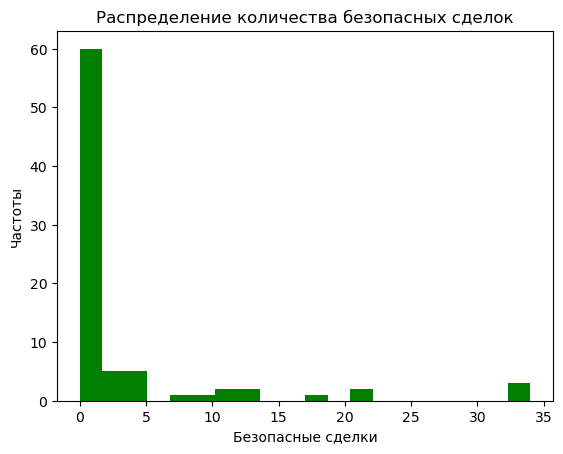

In [22]:
plt.hist(slice_df['Безопасные сделки'], bins=20, color='green')
plt.title('Распределение количества безопасных сделок') 
plt.xlabel('Безопасные сделки')
plt.ylabel('Частоты');

In [23]:
# сильное смещение значений в сторону 0, однородность
print("Репрезентирующее значение: ", ss1.summary()['median']['Безопасные сделки'])

Репрезентирующее значение:  0.0


In [24]:
ss2 = ScaleStatistics(slice_df, ['Разница между + и - отзывами'])


SCALE STATISTICS SUMMARY
------------------



,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
Разница между + и - отзывами,82.000,0.000,0.000,7.171,0.000,4.000,4.000,0.066,0.000,61.000,61.000,15.086,227.600,0.631,0.706


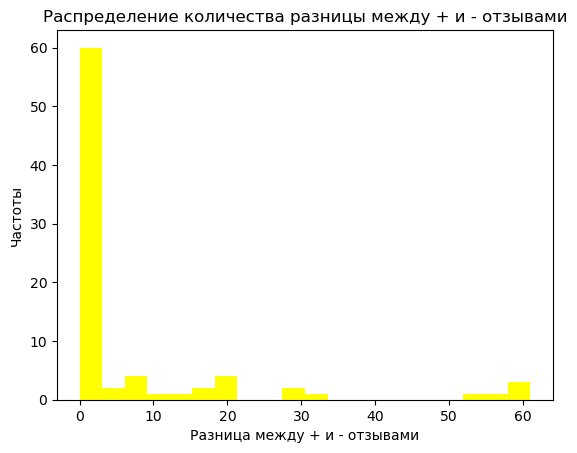

In [25]:
plt.hist(slice_df['Разница между + и - отзывами'], bins=20, color='yellow')
plt.title('Распределение количества разницы между + и - отзывами') 
plt.xlabel('Разница между + и - отзывами')
plt.ylabel('Частоты');

In [26]:
# сильное смещение значений в сторону 0, однородность
print("Репрезентирующее значение: ", ss2.summary()['median']['Разница между + и - отзывами'])

Репрезентирующее значение:  0.0


In [27]:
corr = Correlation(slice_df[['Безопасные сделки', 'Разница между + и - отзывами']])


CORRELATION SUMMARY (PEARSON METHOD, 2-TAILED)
------------------


Note: Each empty index duplicates the previous one.
Maximum correlation is 0.896 (p-value 0.0) for variables Безопасные сделки and Разница между + и - отзывами,
minimum correlation is 0.896 (p-value 0.0) for variables Безопасные сделки and Разница между + и - отзывами.


In [28]:
corr.sort_correlations()

Note: Each empty index duplicates the previous one.


,,Coefficient,p-value
Безопасные сделки,Разница между + и - отзывами,0.896371,5.388626e-30


In [29]:
# коэффициент корреляции = 0.896, => корреляция сильная прямая
# p-value очень близок к 0, поэтому мы уверенно можем доверять этому коэффициенту

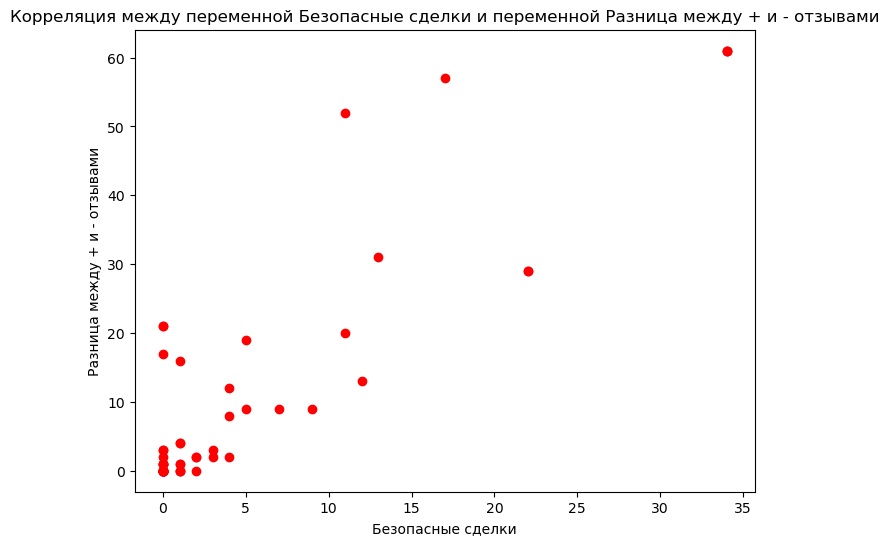

In [30]:
var = ["Безопасные сделки", "Разница между + и - отзывами"]
plt.figure(figsize=(8,6))
plt.scatter(slice_df[var[0]], slice_df[var[1]], c='red') # График для иллюстрации парной связи (сначала ось х, потом ось у)
plt.title(f'Корреляция между переменной {var[0]} и переменной {var[1]}') # Заголовок графика
plt.xlabel(var[0]) # Название оси Х
plt.ylabel(var[1]);

In [31]:
# Видим, что все точки располагаются рядом с диагональю, что подтверждает корреляцию

In [32]:
# Гипотеза H1 подтвердилась